<a href="https://colab.research.google.com/github/tijanatesla2/Principi-prezentacije-i-prepoznavanja-oblika/blob/main/TijanaTeslaIT81g2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install tensorflow==2.1.0

In [13]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [14]:
!pip install keras==2.5.0rc0
!pip install keras_applications==1.0.8
!pip install image-classifiers==1.0.0

  Using cached https://files.pythonhosted.org/packages/5c/1f/5ebba489d726f089d17591d56af3756a1261371f795da0e7f23dc9b4d8ac/keras-2.5.0rc0-py2.py3-none-any.whl
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [15]:
import os
import cv2
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator#, img_to_array, load_img
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, load_model

In [6]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1dEwDovsJfkZ1nFTQLRghfjWCoyt5nA7N' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1dEwDovsJfkZ1nFTQLRghfjWCoyt5nA7N" -O jedan.zip && rm -rf /tmp/cookies.txt

--2021-07-06 14:31:07--  https://docs.google.com/uc?export=download&confirm=&id=1dEwDovsJfkZ1nFTQLRghfjWCoyt5nA7N
Resolving docs.google.com (docs.google.com)... 142.250.157.100, 142.250.157.102, 142.250.157.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.157.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-a0-docs.googleusercontent.com/docs/securesc/et8jiamdc93q9c76pm8es94tau3ot6th/6pn73te3fv61jvh9kkni94de4t6ggthv/1625581875000/08234804473790593200/13123559656932704181Z/1dEwDovsJfkZ1nFTQLRghfjWCoyt5nA7N?e=download [following]
--2021-07-06 14:31:29--  https://doc-10-a0-docs.googleusercontent.com/docs/securesc/et8jiamdc93q9c76pm8es94tau3ot6th/6pn73te3fv61jvh9kkni94de4t6ggthv/1625581875000/08234804473790593200/13123559656932704181Z/1dEwDovsJfkZ1nFTQLRghfjWCoyt5nA7N?e=download
Resolving doc-10-a0-docs.googleusercontent.com (doc-10-a0-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting

In [7]:
!unzip jedan.zip

Archive:  jedan.zip
  inflating: LICENSE                 
  inflating: harry-potter/0001/001.jpg  
  inflating: harry-potter/0001/002.jpg  
  inflating: harry-potter/0001/003.jpg  
  inflating: harry-potter/0001/004.jpg  
  inflating: harry-potter/0001/005.jpg  
  inflating: harry-potter/0001/006.jpg  
  inflating: harry-potter/0001/007.jpg  
  inflating: harry-potter/0001/008.jpg  
  inflating: harry-potter/0001/009.jpg  
  inflating: harry-potter/0001/010.jpg  
  inflating: harry-potter/0001/011.jpg  
  inflating: harry-potter/0001/012.jpg  
  inflating: harry-potter/0001/013.jpg  
  inflating: harry-potter/0002/001.jpg  
  inflating: harry-potter/0002/002.jpg  
  inflating: harry-potter/0002/003.jpg  
  inflating: harry-potter/0002/004.jpg  
  inflating: harry-potter/0002/005.jpg  
  inflating: harry-potter/0002/006.jpg  
  inflating: harry-potter/0002/007.jpg  
  inflating: harry-potter/0002/008.jpg  
  inflating: harry-potter/0002/009.jpg  
  inflating: harry-potter/0002/010.jpg  

In [16]:
index_file = pd.read_csv(r"/content/lego-minifigures-classification/index.csv")
metadata = pd.read_csv(r"/content/lego-minifigures-classification/metadata.csv")

In [17]:
df = pd.merge(index_file, metadata[['class_id','minifigure_name']], on='class_id')
df

,path,class_id,minifigure_name
0,marvel/0001/001.jpg,1,SPIDER-MAN
1,marvel/0001/002.jpg,1,SPIDER-MAN
2,marvel/0001/003.jpg,1,SPIDER-MAN
3,marvel/0001/004.jpg,1,SPIDER-MAN
4,marvel/0001/005.jpg,1,SPIDER-MAN
...,...,...,...
337,star-wars/0014/005.jpg,35,ANAKIN SKYWALKER
338,star-wars/0014/006.jpg,35,ANAKIN SKYWALKER
339,star-wars/0014/007.jpg,35,ANAKIN SKYWALKER
340,star-wars/0014/008.jpg,35,ANAKIN SKYWALKER


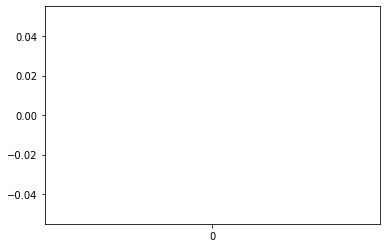

In [18]:
sns.barplot()


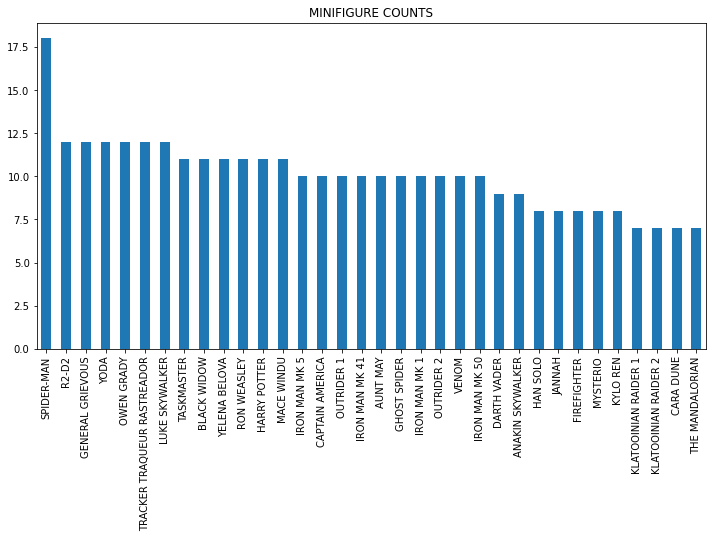

In [19]:
df['minifigure_name'].value_counts().plot(kind='bar', figsize=(12,6), title='MINIFIGURE COUNTS')

In [21]:
df_train = pd.DataFrame([])
df_valid = pd.DataFrame([])

for i in range(1,len(df['class_id'].value_counts())+1):
    df_train = df_train.append(df[df['class_id'] == i].iloc[ :-1])    
    df_valid = df_valid.append(df[df['class_id'] == i].iloc[-1: ])

In [22]:
print('no. of classes: ', len(df['class_id'].unique()))
print('no. of names: ', len(df['minifigure_name'].unique()))

no. of classes:  35
no. of names:  34


In [23]:
common_dir = "/content/lego-minifigures-classification"

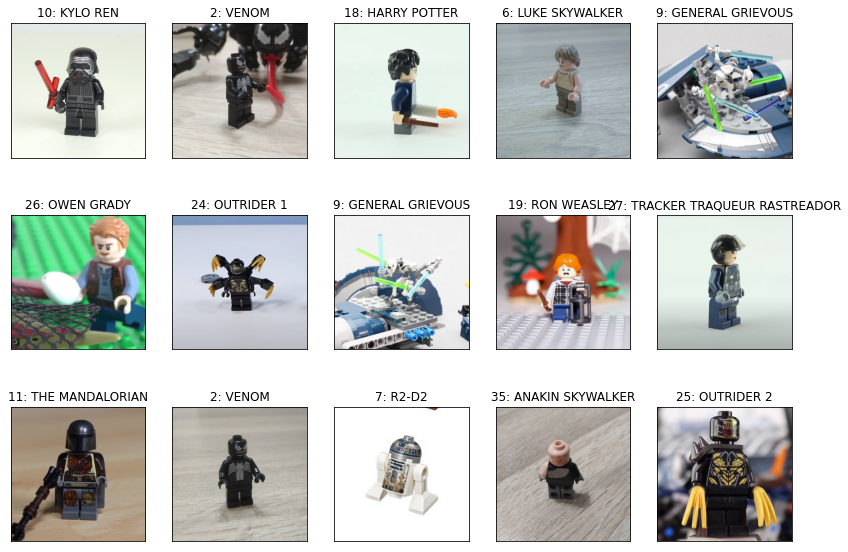

In [24]:
plt.figure(figsize=(14,10))
for i, j in enumerate(df.sample(15).iterrows(), 1):
    plt.subplot(3,5,i)
    image = cv2.imread(os.path.join(common_dir, j[1]['path']))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(f"{j[1]['class_id']}: {j[1]['minifigure_name']}")
    plt.xticks([])
    plt.yticks([])

In [26]:
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.3, rotation_range=30,
                                   width_shift_range=0.3, height_shift_range=0.3,
                                   brightness_range=[0.2,1.0], horizontal_flip=True, 
                                   vertical_flip= True, fill_mode='nearest',zoom_range=0.4) 

valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [27]:
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory=common_dir, 
                                                    x_col='path',y_col='minifigure_name',shuffle=True,
                                                   target_size=(256,256),batch_size=16)

valid_generator = valid_datagen.flow_from_dataframe(dataframe= df_valid, directory= common_dir,
                                                   x_col='path', y_col='minifigure_name',
                                                   shuffle=False, batch_size=16, target_size=(256,256))

Found 307 validated image filenames belonging to 34 classes.
Found 35 validated image filenames belonging to 34 classes.


In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Checkpoint to save the best model measuring the val_loss.
callbacks_save = ModelCheckpoint('best LEGO-CNN.hdf5', 
                                 monitor='val_loss', 
                                 mode='min', 
                                 save_best_only=False)

In [29]:
from tensorflow import keras

In [30]:
pip install tensorflow-estimator==2.1.*

In [5]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.1
!pip install -q keras==2.3.1
!pip install -q tensorflow-estimator==2.1.

## Imports libs
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [31]:
from tensorflow import keras

In [32]:
!pip install efficientnet
import efficientnet.tfkeras as efn

In [2]:
pip install 'h5py<3.0.0'

In [ ]:
base_model = efn.EfficientNetB6(input_shape=(256,256,3), 
                                weights='imagenet', 
                                include_top=False, 
                                pooling='avg')
# Here 3 in input_shape represent channels: 
# In RFB image their are 3 channels(coloured image in layman's language).

x = Dropout(rate=0.3)(base_model.output)    # adding Droupout layer to the model.
prediction_efn = Dense(34, activation='softmax')(x)
model = Model(base_model.input, prediction_efn)

model.compile(optimizer = Adam(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
model.fit(x=train_generator, 
          validation_data=valid_generator, 
          epochs=20, 
          callbacks=[early_stop, callbacks_save])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/20
20/20 [==============================] - 77s 4s/step - loss: 3.5338 - accuracy: 0.0293 - val_loss: 3.4801 - val_accuracy: 0.0857
Epoch 2/20
20/20 [==============================] - 35s 2s/step - loss: 3.3963 - accuracy: 0.0977 - val_loss: 3.3769 - val_accuracy: 0.1143
Epoch 3/20
20/20 [==============================] - 36s 2s/step - loss: 3.2162 - accuracy: 0.1759 - val_loss: 3.2617 - val_accuracy: 0.2286
Epoch 4/20
20/20 [==============================] - 35s 2s/step - loss: 3.0424 - accuracy: 0.3029 - val_loss: 3.1073 - val_accuracy: 0.3714
Epoch 5/20
20/20 [==============================] - 35s 2s/step - loss: 2.7687 - accuracy: 0.4821 - val_loss: 2.8162 - val_accuracy: 0.6286
Epoch 6/20
20/20 [==============================] - 35s 2s/step - loss: 2.4843 - accuracy: 0.6124 - val_loss: 2.4514 - val_accuracy: 0.7143
Epoch 7/20
20/20 [==============================] - 35s 2s/step - los

In [35]:
loss = model.history.history['loss']
accuracy = model.history.history['accuracy']
val_loss = model.history.history['val_loss']
val_accuracy = model.history.history['val_accuracy']

Text(0.5, 1.0, 'Training and validation loss')

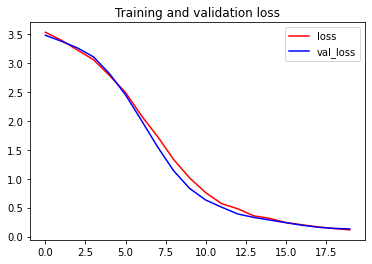

In [36]:
# Plotting Training and Validation set loss.

plt.plot(loss, color='r', label='loss')
plt.plot(val_loss, color='b', label='val_loss')
plt.legend()
plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and validation Accuracy')

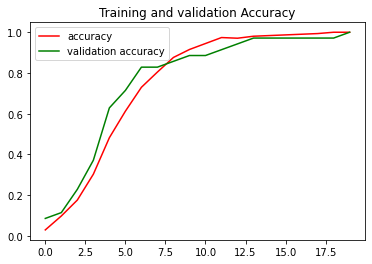

In [37]:
# Plotting Training and Validation set Accuracy.

plt.plot(accuracy, color='r', label='accuracy')
plt.plot(val_accuracy, color='g', label='validation accuracy')
plt.legend()
plt.title('Training and validation Accuracy')

In [38]:
model_LEGO = load_model('best LEGO-CNN.hdf5')

Text(0.5, 1.0, 'OWEN GRADY')

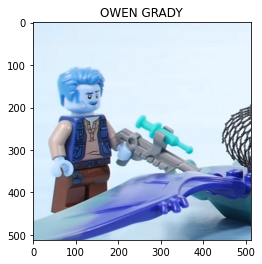

In [39]:
import random

n = len(df_valid)
random_image = random.randrange(n) # randomly selecting one number.

test_set = df_valid['path'].iloc[random_image] # Picking the image based on randomly selected number.

# Graphically representing the Image.
test_image = cv2.imread(os.path.join(common_dir, test_set))
plt.imshow(test_image)
plt.title(df_valid['minifigure_name'].iloc[random_image])

In [40]:
test_image = cv2.resize(test_image, dsize=(256,256))# reshaping the image size into(512,512)
test_image = np.reshape(test_image, (1,256,256,3)) # 1 image, (512,512) size, 3 representing the RGB type.

prediction = model.predict(test_image).argmax()

In [41]:
minifigure_name = metadata['minifigure_name'][metadata['class_id'] == prediction].iloc[0]
print('True name of predicted figure: ', minifigure_name)

True name of predicted figure:  SPIDER-MAN
